# Анализ данных | Python 
## ОП «Журналистика», ОП «Медиакоммуникации» 2022/23

## Семинар 9

## Введение в визуализацию данных

Автор: *Довгополый И. А.*

Источник и описание данных: [Kaggle](https://www.kaggle.com/datasets/shrutipandit707/studytime)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Разбираем самопроверку и тест (если нужно)

In [ ]:
# оказалось не нужно

### Введение в matplotlib, рисование графиков

**Пример.** Параболическая функция:

In [2]:
x = np.linspace(-10, 10, 1000)

y_abs = np.abs(x)
y_2 = x ** 2
y_3 = x ** 3

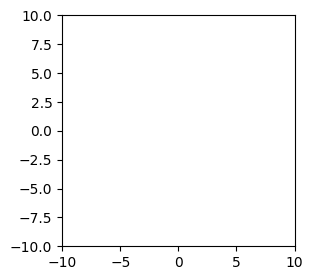

In [3]:
fig, ax = plt.subplots(figsize=(3, 3))

ax.set_xlim([x.min(), x.max()])
ax.set_ylim([x.min(), x.max()])

plt.show()

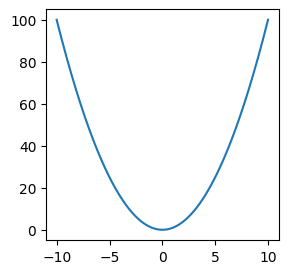

In [4]:
fig, ax = plt.subplots(figsize=(3, 3))

ax.plot(x, y_2)

plt.show()

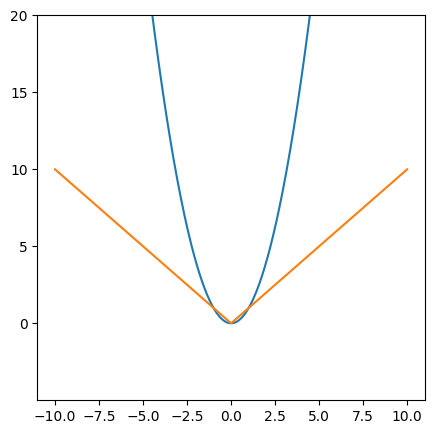

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x, y_2)
ax.plot(x, y_abs)


ax.set_ylim([None, 20])

plt.show()

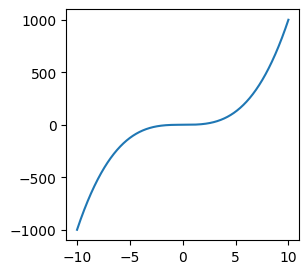

In [6]:
fig, ax = plt.subplots(figsize=(3, 3))

ax.plot(x, y_3)

plt.show()

![](https://matplotlib.org/stable/_images/anatomy.png)

**Задание 1.** Нарисовать квадратик:

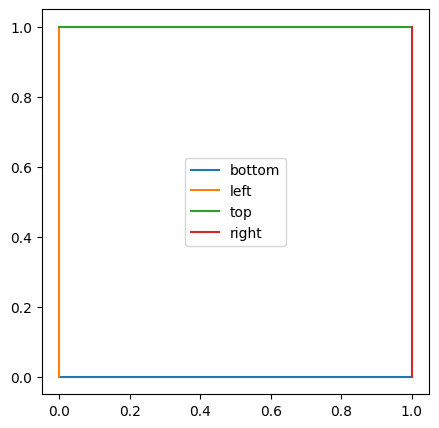

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot([0, 1], [0, 0], label='bottom')
ax.plot([0, 0], [0, 1], label='left')
ax.plot([0, 1], [1, 1], label='top')
ax.plot([1, 1], [0, 1], label='right')

ax.legend()

plt.show()

**Задание 2.** Нарисовать кружочек:

*Формула*: `(x) ** 2 + (y) ** 2 = R ** 2` (`a = 0, b = 0`)

*Выражение Y*: `+/-sqrt(R ** 2 - x ** 2)`

In [19]:
R = 2  # важно правильно подобрать радиус...

x = np.linspace(-2, 2, 100)  # ...и значения
y1 = (R ** 2 - x ** 2) ** (1 / 2)
y2 = - ((R ** 2 - x ** 2) ** (1 / 2))

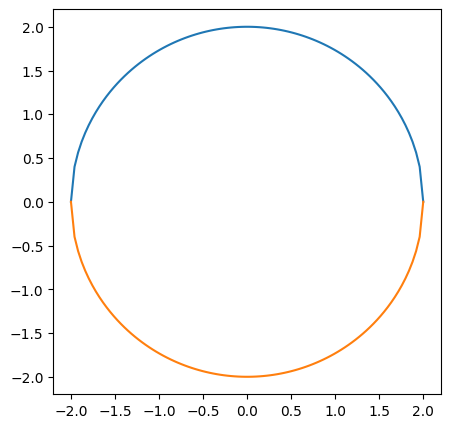

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(x, y1)
ax.plot(x, y2)

plt.show()

**Задание 3.**

Известно, что для отрисовки сердечка нужны следующие координаты X и Y:

x = 16 * sin3(θ)

y = 13 * cos(θ) - 5 * cos(2θ) - 2*cos(3θ) - cos(4θ)

Нарисуйте этот график (при условии, что `theta` для вас уже задана). График должен иметь следующие параметры:

1. Размер 16 на 9.
2. Название "Любовь по версии `matplotlib`".
3. Красный цвет линии.
4. Линия должна иметь толщину 3...
5. И быть пунктирной.
6. Любые подписи осей - на ваш вкус.

In [8]:
theta = np.linspace(0, 2 * np.pi, 100)

x = 16 * np.sin(theta) ** 3
y = 13 * np.cos(theta) - 5 * np.cos(2 * theta) - 2 * np.cos(3 * theta) - np.cos(4 * theta)

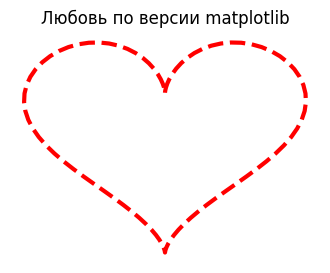

In [13]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(x, y, color='red', linewidth=3, linestyle='--')
ax.spines.right.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)

ax.axis('off')  # убрать все, кроме картинки и подписи

ax.set_title('Любовь по версии matplotlib');

### Разбираем то, что видели в семинаре 8
#### График линейной регрессии

In [85]:
data = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/marks.csv')
data = data.rename(columns=lambda name: name.lower())

X = data['time_study'].values
Y = data['marks'].values

a, b = np.polyfit(X, Y, 1)

Y_pred = a * X + b

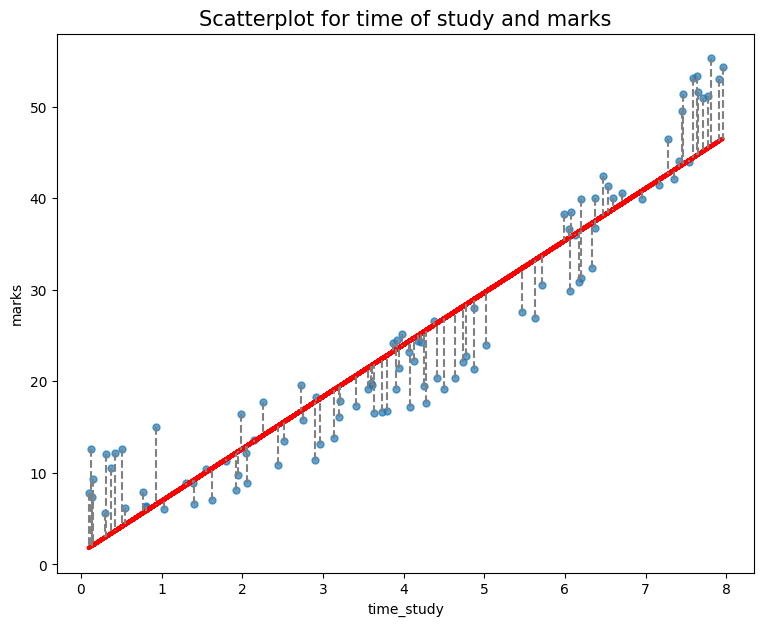

In [103]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.set_title('Scatterplot for time of study and marks', size=15)
ax.set_xlabel('time_study')
ax.set_ylabel('marks')

ax.plot(X, Y, linestyle='None', marker='.', alpha=.7, markersize=10)
ax.plot(X, Y_pred, color='red', linewidth=3)

for index in range(X.size):
    ax.plot([X[index], X[index]], [Y[index], Y_pred[index]], color='grey', linestyle='--');

In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/marks.csv')
data = data.rename(columns=lambda name: name.lower())

X = data['time_study'].values
Y = data['marks'].values

a, b = np.polyfit(X, Y, 1)
Ypredicted = a * X + b

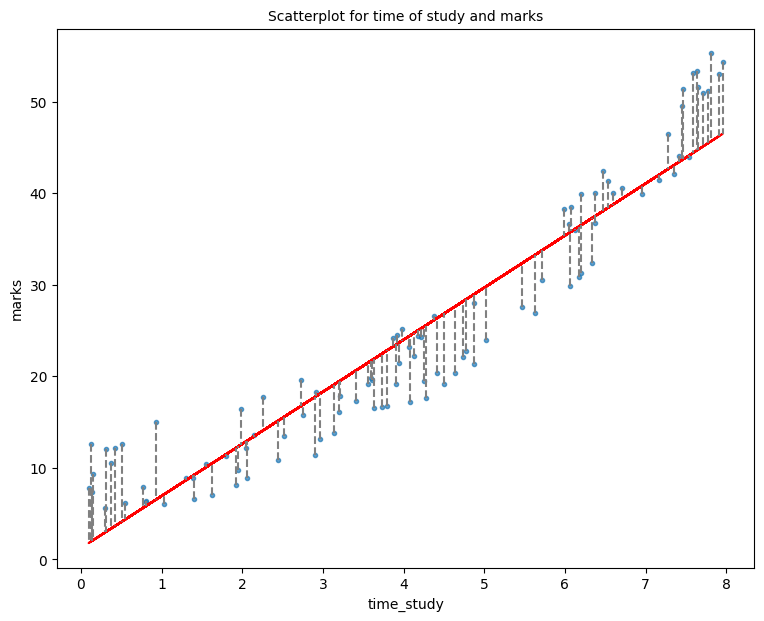

In [82]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(data['time_study'], data['marks'], marker='.', linestyle='None', alpha=.7)
ax.plot(X, Ypredicted, color='red')

for ind in range(X.size):
    plt.plot((X[ind], X[ind]), (Y[ind], Ypredicted[ind]), linestyle='--', color='grey')

ax.set_title('Scatterplot for time of study and marks', size=10)
ax.set_xlabel('time_study')
ax.set_ylabel('marks')

plt.show()

#### Гистограмма

In [18]:
def permutation_diff(x, y):
    ind = x.size
    
    xy = np.concatenate((x, y))
    permutation = np.random.permutation(xy)
    
    x_new, y_new = permutation[:ind], permutation[ind:]
    
    return x_new.mean() - y_new.mean()

data['courses_more_than5'] = data['number_courses'] > 5

time_study_less5 = data.loc[~data['courses_more_than5'], 'time_study'].values
time_study_more5 = data.loc[data['courses_more_than5'], 'time_study'].values

n_repeats = 10000

mean_actual_diff = time_study_more5.mean() - time_study_less5.mean()
permutation_diffs = [permutation_diff(time_study_more5, time_study_less5) for i in range(n_repeats)]

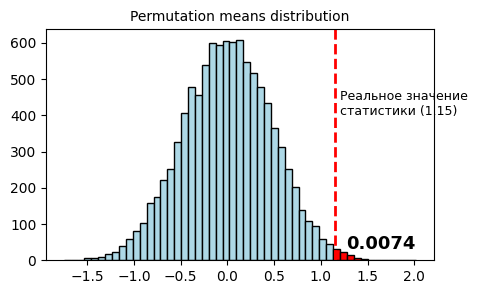

In [19]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.hist(permutation_diffs, bins=51)
ax.set_title('Permutation means distribution', size=10)
ax.axvline(x=mean_actual_diff, ymin=0, ymax=370, color='red', linewidth=2, linestyle='--')

for bar in ax.containers[0]:
    # get x midpoint of bar
    x = bar.get_x() + 0.5 * bar.get_width()

    # set bar color based on x
    if x < mean_actual_diff:
        bar.set_color('lightblue')
        bar.set_edgecolor('black')
    else:
        bar.set_color('red')
        bar.set_edgecolor('black')

ax.text(1.27, 30, str((np.array(permutation_diffs) >= mean_actual_diff).mean().round(4)), weight='bold', size=13)
ax.text(1.2, 400, f'Реальное значение\nстатистики ({round(mean_actual_diff, 2)})', size=9)

plt.show()

### Погнали визуализировать то, что считали раньше, от простого к сложному
#### Проверка гипотезы о доходах фанатов ЗВ (Семинар 3)

In [105]:
sw = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/StarWars.csv', sep=';')
sw.head()

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa
0,3292879998,да,да,М,18-29,NaN,Южно-Атлантический,очень нравится,очень нравится
1,3292879538,нет,NaN,М,18-29,0 - 24.999,Юго-Западный центральный,NaN,NaN
2,3292765271,да,нет,М,18-29,0 - 24.999,Северо-Западный центральный,не знаю такого персонажа,нравится
3,3292763116,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,очень нравится,очень нравится
4,3292731220,да,да,М,18-29,100.000 - 149.999,Северо-Западный центральный,нравится,нравится


In [106]:
fans = sw[sw['fan'] == 'да']  # разделим данные на две группы: фанаты и не фанаты
not_fans = sw[sw['fan'] == 'нет']

fans_stats = fans['income'].value_counts()  # посмотрим на распределение переменной income в двух этих группах
not_fans_stats = not_fans['income'].value_counts()

In [107]:
fans_stats

50.000 - 99.999      156
25.000 - 49.999       84
100.000 - 149.999     79
0 - 24.999            61
150.000+              55
Name: income, dtype: int64

In [111]:
fans_stats.values

array([156,  84,  79,  61,  55], dtype=int64)

In [115]:
['0 - 24.999', '25.000 - 49.999', '50.000 - 99.999', '100.000 - 149.999', '150.000+']

['0 - 24.999',
 '100.000 - 149.999',
 '150.000+',
 '25.000 - 49.999',
 '50.000 - 99.999']

In [116]:
fans_stats[['0 - 24.999', '25.000 - 49.999', '50.000 - 99.999', '100.000 - 149.999', '150.000+']]

0 - 24.999            61
25.000 - 49.999       84
50.000 - 99.999      156
100.000 - 149.999     79
150.000+              55
Name: income, dtype: int64

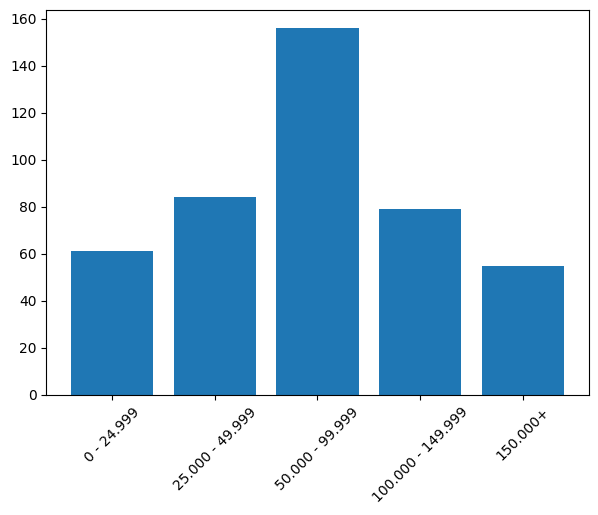

In [117]:
fig, ax = plt.subplots(figsize=(7, 5))

x_ticks = ['0 - 24.999', '25.000 - 49.999', '50.000 - 99.999', '100.000 - 149.999', '150.000+']

ax.bar(x=x_ticks, height=fans_stats[x_ticks].values)
plt.xticks(rotation=45);